# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

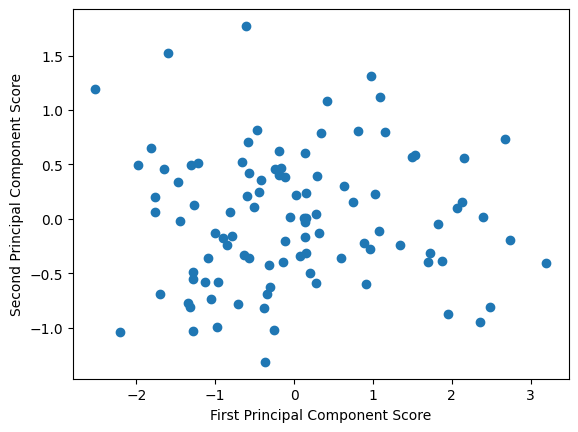

In [14]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

The three outliers in the upper left have low first and high second principal component scores, meaning their series_3 values deviate significantly from series_1 and series_2.
We can't say much about series_1 vs. series_2 individually because they are highly correlated, and PCA mixes them.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [15]:
df_movies = pd.read_csv("https://raw.githubusercontent.com/Marara29/Module-B-semester-2/refs/heads/main/enhanced_box_office_data(2000-2024)u.csv")

In [16]:
df_movies['Rating'] = df_movies['Rating'].astype(str).str.extract(r'([\d.]+)').astype(float)
df_clean = df_movies.dropna(subset=['Rating', 'Vote_Count', '$Worldwide', '$Domestic', '$Foreign'])

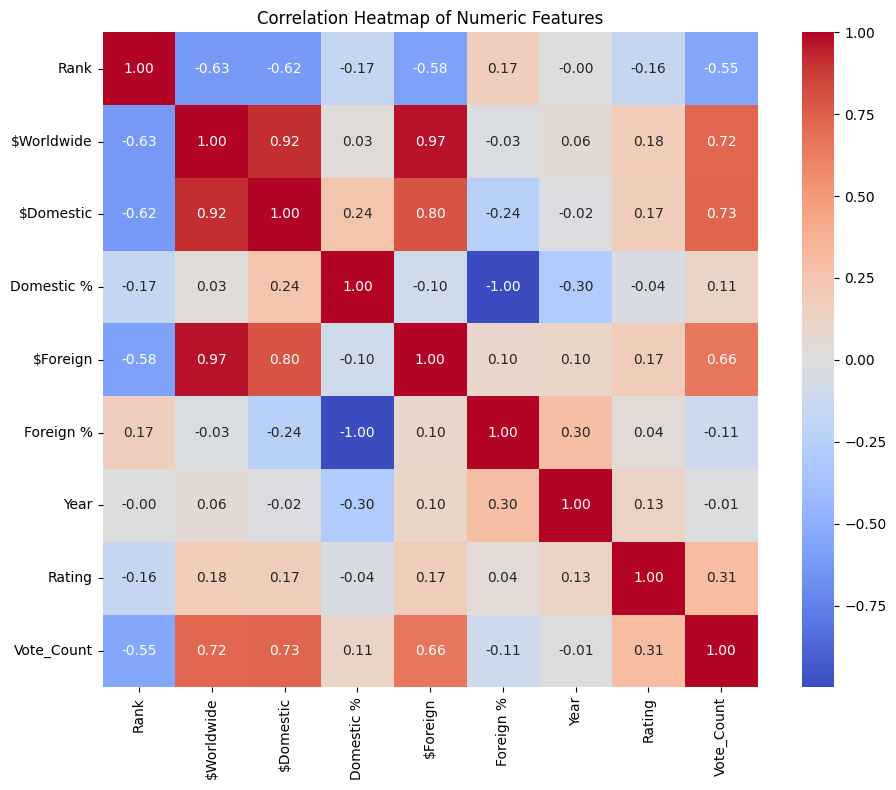

In [17]:
numeric_cols = df_clean.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [18]:
numeric_cols

,Rank,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Rating,Vote_Count
0,1,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,6.126,6741.0
1,2,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,8.217,19032.0
2,3,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,7.663,11403.0
3,4,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,6.450,3944.0
4,5,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,6.544,2530.0
...,...,...,...,...,...,...,...,...,...
4995,196,7361414.0,5600000.0,76.1,1761414.0,23.9,2024,7.000,30.0
4996,197,7343114.0,0.0,0.0,7343114.0,100.0,2024,4.000,4.0
4997,198,7305588.0,0.0,0.0,7305588.0,100.0,2024,0.000,0.0
4998,199,7241561.0,2001584.0,27.6,5239977.0,72.4,2024,6.300,70.0


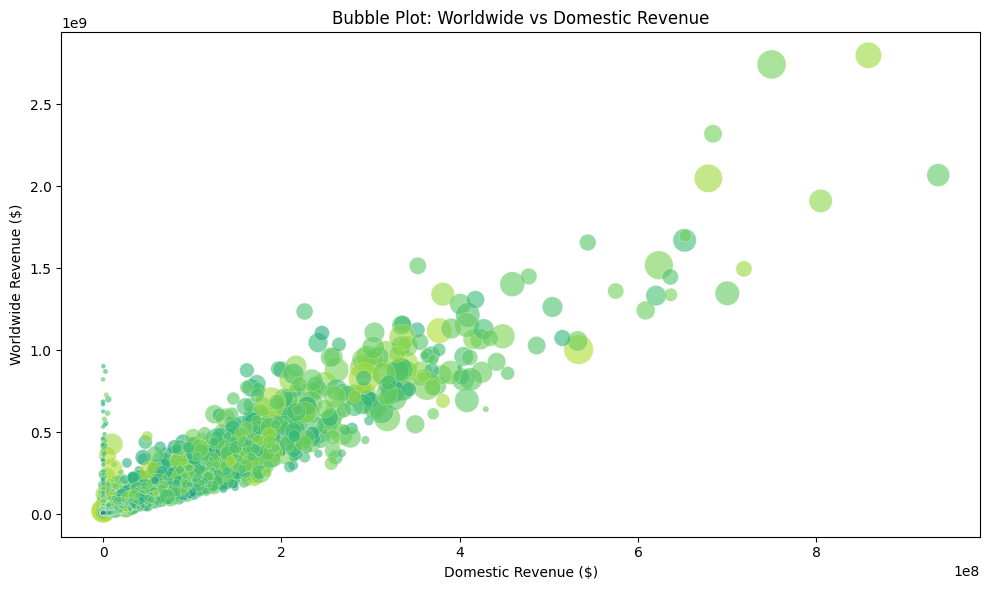

In [19]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_clean,
    x="$Domestic",
    y="$Worldwide",
    size="Vote_Count",
    hue="Rating",
    palette="viridis",
    sizes=(10, 500),
    alpha=0.6,
    legend=False
)

plt.title("Bubble Plot: Worldwide vs Domestic Revenue")
plt.xlabel("Domestic Revenue ($)")
plt.ylabel("Worldwide Revenue ($)")
plt.tight_layout()
plt.show()

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features_for_pca = df_clean[["$Worldwide", "$Domestic", "$Foreign", "Domestic %", "Foreign %", "Rating", "Vote_Count"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_pca)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
pca_components = pd.DataFrame(pca.components_, columns=features_for_pca.columns, index=[f'PC{i+1}' for i in range(len(features_for_pca.columns))])
explained_variance = pca.explained_variance_ratio_

pca_components, explained_variance

(     $Worldwide  $Domestic  $Foreign  Domestic %  Foreign %        Rating  \
 PC1    0.516433   0.503211  0.484542    0.088252  -0.088249  1.589882e-01   
 PC2   -0.094903   0.073583 -0.185006    0.686501  -0.686500 -9.314600e-02   
 PC3   -0.156444  -0.112019 -0.170143    0.038105  -0.038120  9.554801e-01   
 PC4   -0.257215  -0.115015 -0.319704   -0.063675   0.063688 -2.302531e-01   
 PC5   -0.073750   0.788993 -0.566681   -0.124166   0.124197  9.376741e-03   
 PC6   -0.054321   0.020891  0.036194    0.705447   0.705441  1.175928e-05   
 PC7    0.790738  -0.304371 -0.526683    0.048463   0.048462  1.108526e-07   
 
        Vote_Count  
 PC1  4.521514e-01  
 PC2 -1.046566e-02  
 PC3  1.348369e-01  
 PC4  8.702149e-01  
 PC5 -1.414025e-01  
 PC6 -4.351256e-06  
 PC7 -9.235154e-07  ,
 array([5.00439825e-01, 2.93364487e-01, 1.36948065e-01, 4.96965412e-02,
        1.95510581e-02, 2.36314951e-08, 4.75333275e-11]))

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

target_columns = ["$Worldwide", "$Domestic", "$Foreign", "Rating", "Vote_Count"]
results = []

for target in target_columns:
    features = [col for col in target_columns if col != target]
    X = df_clean[features]
    y = df_clean[target]
    
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    results.append({'Target': target, 'R²': r2, 'RMSE': rmse})

results_df = pd.DataFrame(results)




Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Ans :I would say ye since I expected a strong correlation among revenue variables (Domestic, Foreign, Worldwide), and this was confirmed both through correlation analysis and linear regression.
Also ,Yes the data is usable as it  is clean, numeric, and suitable for analysis

Do you see any outliers? (Data points that are far from the rest of the data).

Ans:yea , I noticed ,some movies generated a way bigger revenues than rest of others ,  in revenue fied

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Ans:yeah I think so , as PC1 alone captures ~ 50% of the dataset’s variance.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

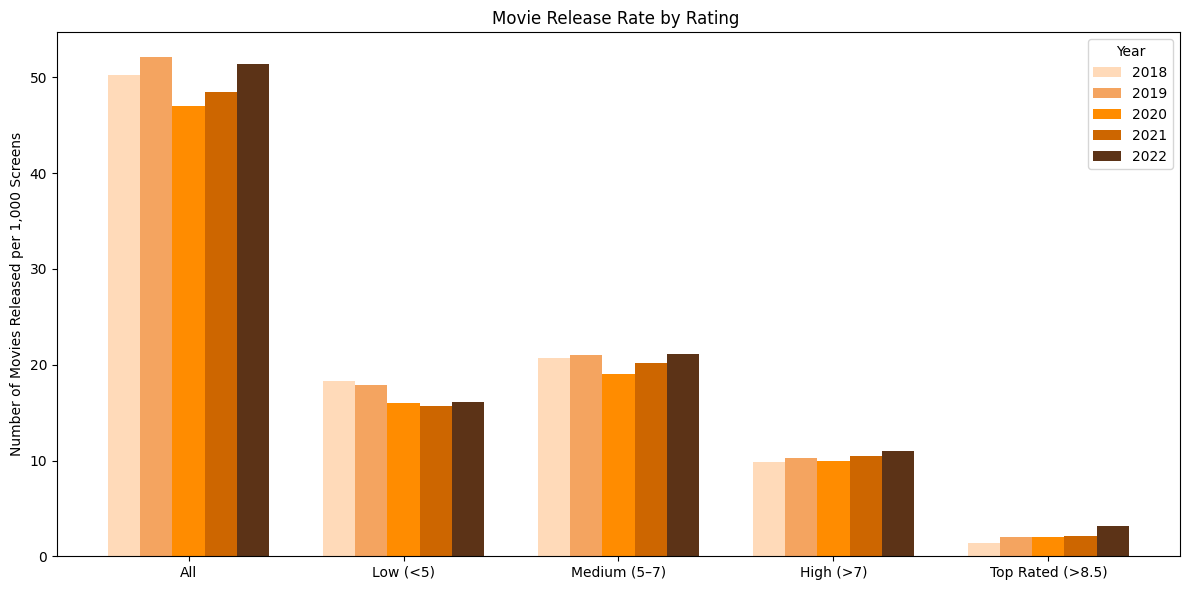

In [22]:

years = ['2018', '2019', '2020', '2021', '2022']
rating_tiers = ['All', 'Low (<5)', 'Medium (5–7)', 'High (>7)', 'Top Rated (>8.5)']
data = [
    [50.2, 18.3, 20.7, 9.8, 1.4],   # 2018
    [52.1, 17.9, 21.0, 10.3, 2.0],  # 2019
    [47.0, 16.0, 19.0, 10.0, 2.0],  # 2020 (pandemic dip)
    [48.5, 15.7, 20.2, 10.5, 2.1],  # 2021
    [51.4, 16.1, 21.1, 11.0, 3.2],  # 2022
]

data = np.array(data)
bar_width = 0.15
x = np.arange(len(rating_tiers))
colors = ['#FFDAB9', '#F4A460', '#FF8C00', '#CD6600', '#5C3317']

# Plot bars
plt.figure(figsize=(12, 6))
for i in range(len(years)):
    plt.bar(x + i * bar_width, data[i], width=bar_width, label=years[i], color=colors[i])

# Labeling and formatting
plt.xticks(x + 2 * bar_width, rating_tiers)
plt.ylabel("Number of Movies Released per 1,000 Screens")
plt.title("Movie Release Rate by Rating ")
plt.legend(title="Year")
plt.tight_layout()
plt.show()
